# t-SNE Explorations

## Initialization
github: https://github.com/gauss256/t-SNE/blob/master/t-SNE%20Explorations.ipynb

interactive notebook: https://mybinder.org/


In [1]:
%matplotlib notebook

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

## Plotting function

In [2]:
def do_plot(X_fit, title, labels):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           c=[col])
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=[col])
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        plt.show()

## Generate data

In [3]:
with open('ClusterFile_os_data_amutile.txt') as f:
    lines = f.readlines()

print('# lines found: ', len(lines))
    
cluster = -1
min_dimension = 10
data=[]
for line in lines:    
    ls = line.rstrip().split(' ')    
    if(len(ls) < min_dimension):        
        cluster += 1        
        continue
    else:
        ls = list(map(float, ls))
        tp = tuple(ls)
        tp = tp + (cluster,)        
        data.append(tp)
print('# cluster detected: ', cluster)
print('# data point detected: ', len(data))

data_df = pd.DataFrame(data)
#data_df

# lines found:  1429
# cluster detected:  28
# data point detected:  1400


## Prep the data for fitting and visualizing

In [5]:
X = data_df.iloc[:,0:-1]
y = data_df[18].values

In [6]:
X.values[:,0:-1].shape

(1400, 17)

## t-SNE (2D)
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

>tsne2 is ready TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=1)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1400 samples in 0.009s...
[t-SNE] Computed neighbors for 1400 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1400
[t-SNE] Computed conditional probabilities for sample 1400 / 1400
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.262001
[t-SNE] KL divergence after 1000 iterations: 0.092865


<IPython.core.display.Javascript object>


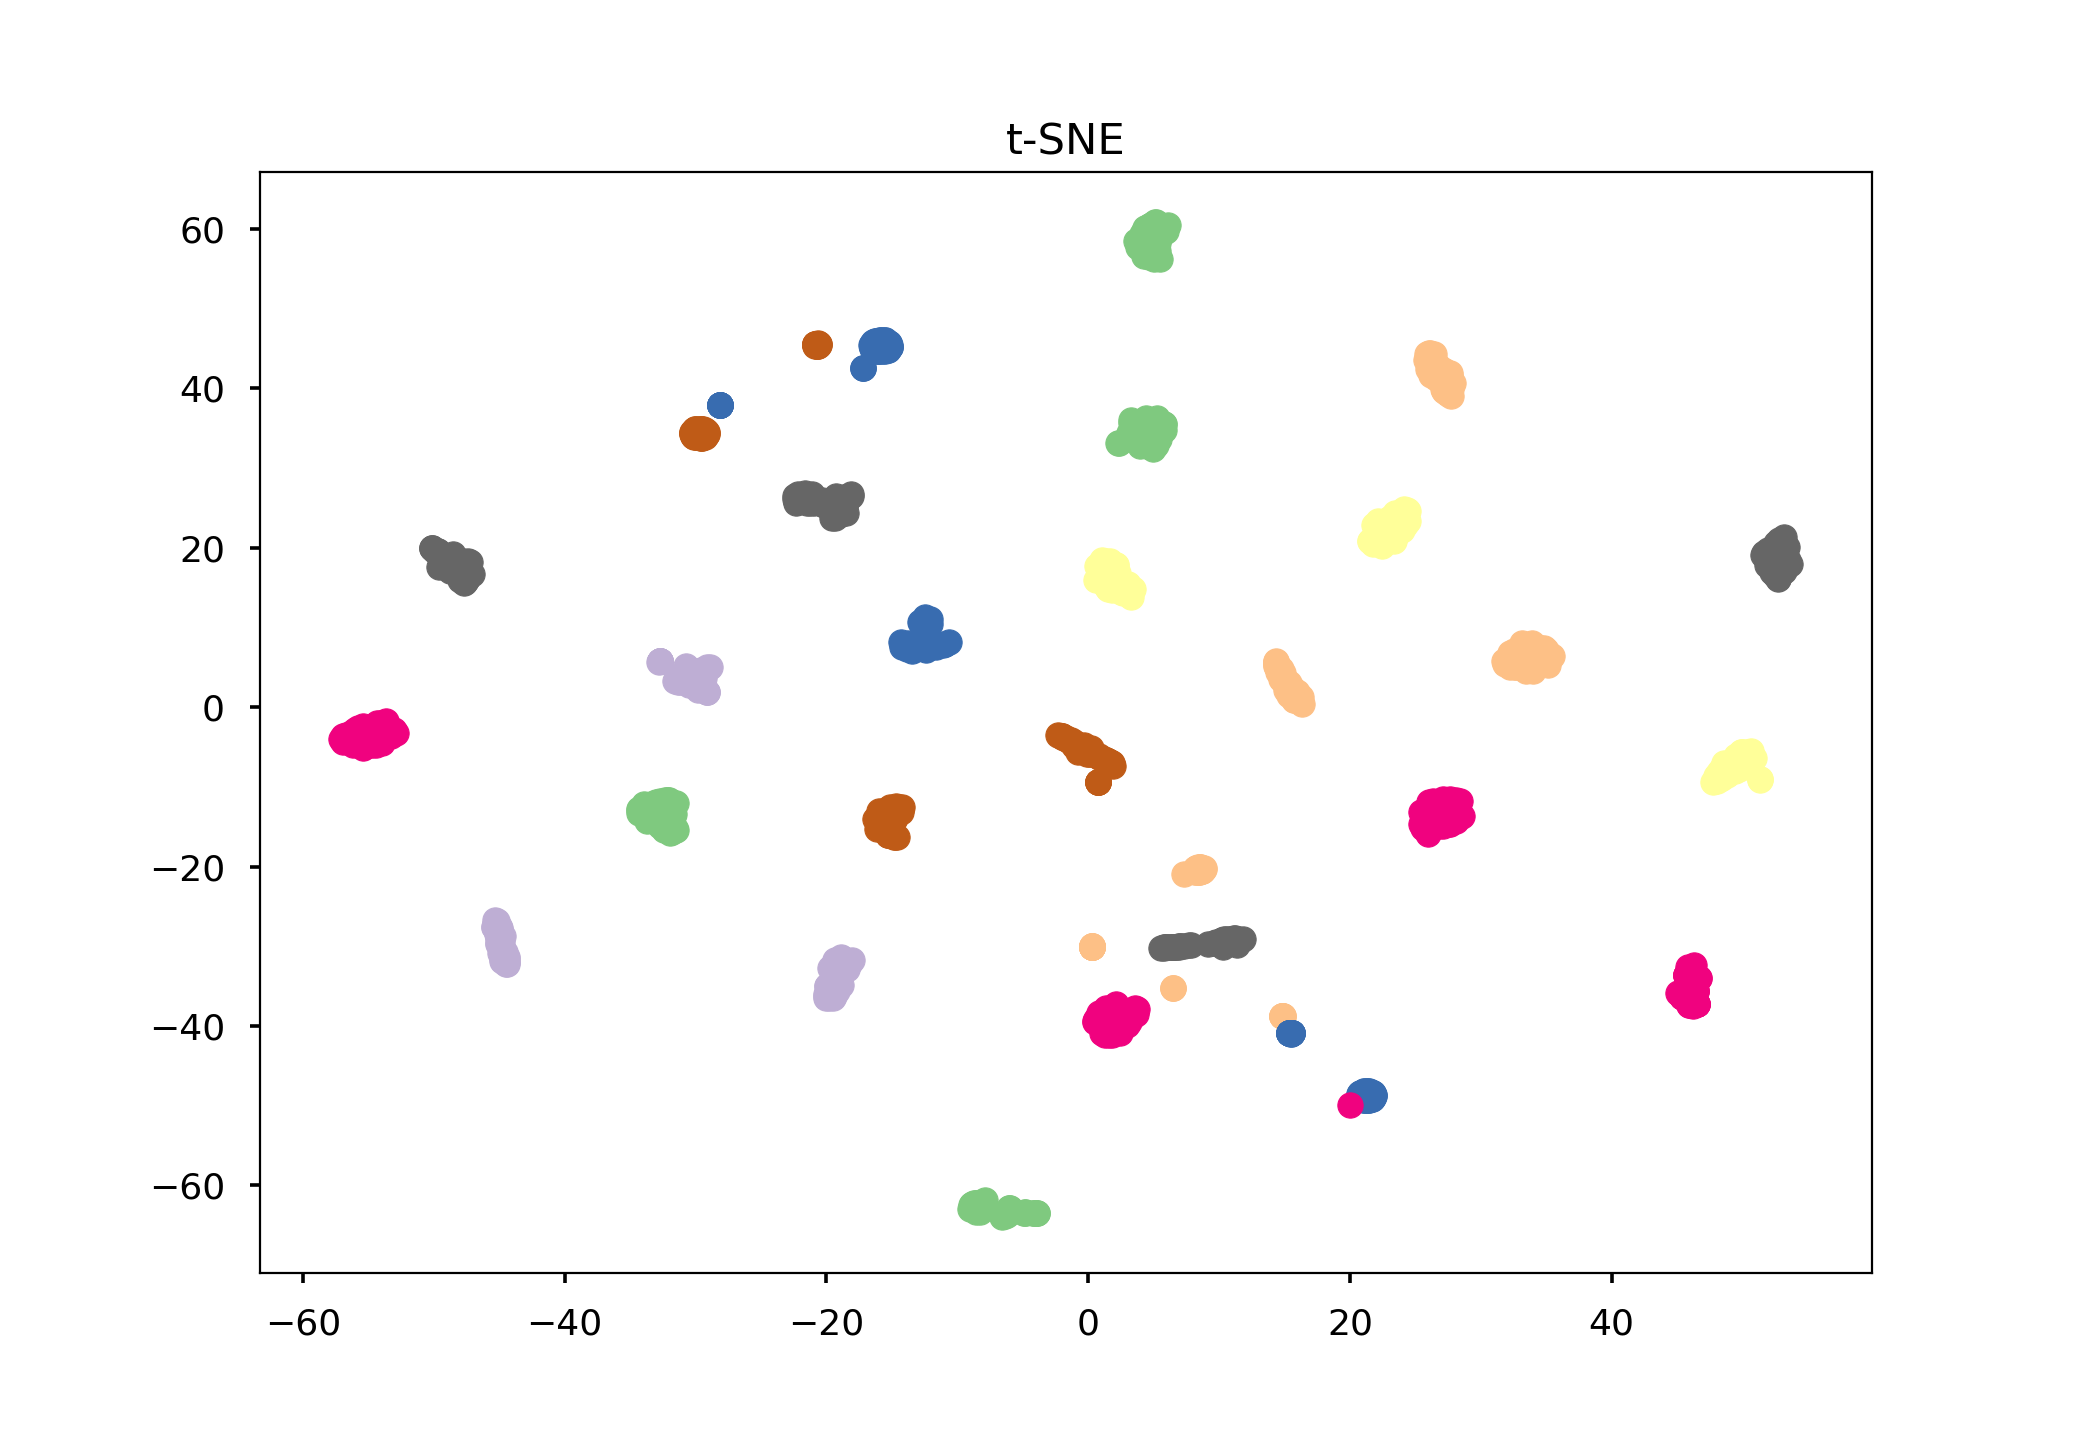

In [7]:
tsne2 = TSNE(n_components=2, random_state=0, verbose=1)
print ('>tsne2 is ready', tsne2)
do_plot(tsne2.fit_transform(X), 't-SNE', y)